# Installing libraries 
* NLTK==3.4  
* yellowbrick 
* Gensim=3.6.0

In [4]:
!pip install nltk==3.4
!pip install yellowbrick -U
!pip install gensim==3.6.0

     |████████████████████████████████| 1.4 MB 5.0 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.4-py3-none-any.whl size=1436397 sha256=516380c3a0c580f59b342560f218380c6886c37f9ae54acde803419694b0efbe
  Stored in directory: /root/.cache/pip/wheels/13/b8/81/2349be11dd144dc7b68ab983b58cd2fae353cdc50bbdeb09d0
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.4 which is incompatible.
     |████████████████████████████████| 23.1 MB 4.3 MB/s eta 0:00:01
  Created wheel for gensim: filename=gensim-3.6.0-cp37-cp37m-linux_x86_64.whl size=24238264 sha256=5e812d7d3fb64d7aa0490f199fc18a329d163fe729e9fb4918abd7e7f3bd6fd1
  Stored in dir

# Loading Libraries

In [5]:
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly imports
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

# Other imports
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import json

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from wordcloud import WordCloud, STOPWORDS



import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 200) # to show more rows.

%matplotlib inline
%load_ext autoreload
%autoreload 2

References :
1. https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial
2. https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
3. https://github.com/ElizaLo/NLP-Natural-Language-Processing

In [6]:
df = pd.read_json('../input/careerdb/database.json')

In [7]:
df.rename(columns={'pregrado':'undergraduate',
                   'Universidad':'university',
                   'detalles':'details',
                   'Descripcion':'description',
                  'Registro calificado':'Qualified record',
                  'Nivel de formación':'Level of Education',
                  'Tipo de formación':'Type of training',
                  'Título otorgado':'Title awarded',
                  'Modalidad':'Modality',
                  'Duración':'Duration',
                  'Créditos':'Credits',
                  'Ciudad':'Town'},inplace=True)
df.head()

undergraduate  \
0  especializacion en gerencia de servicios de salud   
1                                 contaduria publica   
2                                            derecho   
3                                         psicologia   
4                                            derecho   

                                          university  \
0  universidad cooperativa de colombia - sede apa...   
1  universidad cooperativa de colombia - sede apa...   
2  universidad cooperativa de colombia - sede apa...   
3  universidad cooperativa de colombia - sede arauca   
4  universidad cooperativa de colombia - sede arauca   

                                             details  \
0                                   campos de accion   
1                                  objeto de estudio   
2                                                      
3                                                      
4  abordar el sistema juridico como conjunto de n...   

                                         description   SNIES  \
0  el programa de especializacion de gerencia de ...    6742   
1  las particularidades de este programa que se r...  104897   
2  el programa de derecho, estudia el sistema jur...  102434   
3  en la universidad cooperativa de colombia, el ...   54920   
4  el programa de derecho que se ofrece en la ins...    8630   

                                    Qualified record Level of Education  \
0  registro 20185 del 11 de diciembre de 2015, vi...           posgrado   
1  resolucion 14090 del 07 de septiembre de 2015,...           pregrado   
2  resolucion 9967 del 17 de junio de 2020, vigen...           pregrado   
3  resolucion 16951 del 22 de agosto de 2016​, vi...           pregrado   
4  resolucion 10893 del 01 de junio de 2016, vige...           pregrado   

            Type of training                                  Title awarded  \
0            especializacion  especialista en gerencia de servicio de salud   
1              universitaria                               contador publico   
2              universitaria                                        abogado   
3  profesional universitaria                                      psicologo   
4              universitaria                                        abogado   

     Modality      Duration Credits      Town  
0  presencial   2 semestres      30  apartado  
1  presencial   8 semestres     144  apartado  
2  presencial  10 semestres     158  apartado  
3  presencial   8 semestres     147    arauca  
4  presencial  10 semestres     158    arauca

In [8]:
def nan_check(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    return missing_data

nan_check(df)

Total     %
Credits               578  19.7
Modality              300  10.2
Title awarded         163   5.5
Duration               77   2.6
Qualified record       68   2.3
Type of training       57   1.9
SNIES                  50   1.7
Level of Education     49   1.7
undergraduate           0   0.0
university              0   0.0
details                 0   0.0
description             0   0.0
Town                    0   0.0

In [9]:
df.undergraduate.value_counts()

administracion de empresas                                                     67
contaduria publica                                                             54
derecho                                                                        50
psicologia                                                                     49
ingenieria industrial                                                          40
                                                                               ..
especializacion en organizaciones, responsabilidad social y desarrollo          1
maestria en gerencia de la innovacion empresarial                               1
doctorado en logistica y gestion de cadenas de suministros                      1
especializacion en gerencia estrategica de marca                                1
especializacion en ordenamiento y gestion integral de cuencas hidrograficas     1
Name: undergraduate, Length: 1664, dtype: int64

In [10]:
# Delete words like Master, Doctorat , Especialisation, & Technology.
df1 = df[(df['undergraduate'].str.find('especializacion')==-1) &
    (df['undergraduate'].str.find('maestria')==-1) & 
    (df['undergraduate'].str.find('doctorado')==-1) & 
    (df['undergraduate'].str.find('tecnologia')==-1)]

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 1 to 2936
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   undergraduate       1127 non-null   object
 1   university          1127 non-null   object
 2   details             1127 non-null   object
 3   description         1127 non-null   object
 4   SNIES               1092 non-null   object
 5   Qualified record    1072 non-null   object
 6   Level of Education  1088 non-null   object
 7   Type of training    1080 non-null   object
 8   Title awarded       1028 non-null   object
 9   Modality            1015 non-null   object
 10  Duration            1083 non-null   object
 11  Credits             904 non-null    object
 12  Town                1127 non-null   object
dtypes: object(13)
memory usage: 123.3+ KB


In [11]:
df1.undergraduate.value_counts()

administracion de empresas                            67
contaduria publica                                    54
derecho                                               50
psicologia                                            49
ingenieria industrial                                 40
                                                      ..
licenciatura en educacion para la primera infancia     1
psicologia - medellin                                  1
diseño industrial - bogota                             1
profesional en ciencias ambientales                    1
regencia de farmacia                                   1
Name: undergraduate, Length: 375, dtype: int64

In [12]:
def replace_str(x):
    if (str(x).find('administracion') != -1) or (str(x).find('contaduria') != -1) \
    or (str(x).find('economia') != -1) or (str(x).find('negocios') != -1) \
    or (str(x).find('mercadeo') != -1) or (str(x).find('finanzas') != -1) \
    or (str(x).find('publicidad') != -1) or (str(x).find('comercio') != -1):
        return 'BUSINESS'
    elif str(x).find('ingenieria') != -1:
        return 'ENGINEERING'
    elif (str(x).find('derecho') != -1)   or (str(x).find('psico') != -1) \
    or (str(x).find('comunicacion') != -1) or (str(x).find('social') != -1) \
    or (str(x).find('pedagogia') != -1) or (str(x).find('filosofia') != -1) \
    or (str(x).find('educacion infantil') != -1) or (str(x).find('teologia') != -1) \
    or (str(x).find('antropologia') != -1) or (str(x).find('ciencia politica') != -1) \
    or (str(x).find('historia') != -1) or (str(x).find('sociologia') != -1) \
    or (str(x).find('literatura') != -1) or (str(x).find('ciencias politicas') != -1) \
    or (str(x).find('relaciones internacionales') != -1):
        return 'HUMANITIES AND SOCIAL SCIENCE'
    elif (str(x).find('medicina') != -1) or (str(x).find('enfermeria') != -1) \
    or (str(x).find('odontologia') != -1) or (str(x).find('salud en el trabajo') != -1) \
    or (str(x).find('quirurgica') != -1) :
        return 'HEALTH & MEDICINE'
    elif (str(x).find('nutricion') != -1) :
        return 'NUTRITION AND DIETETICS'
    #elif (str(x).find('nutricion') != -1) :
    #    return 'NUTRITION AND DIETETICS'
    elif (str(x).find('educacion fisica') != -1) or (str(x).find('fisioterapia') != -1):
        return 'SPORTS AND PHYSICAL TRAIN'
    elif (str(x).find('artes plasticas') != -1) or (str(x).find('artes visuales') != -1) \
    or (str(x).find('artes audiovisuales') != -1) or (str(x).find('audiovisuales') != -1) \
    or (str(x).find('produccion cultural') != -1) :
        return 'PLASTIC ARTS, VISUAL ARTS'
    elif (str(x).find('arquitectura') != -1) or (str(x).find('music') != -1) \
    or (str(x).find('diseño') != -1) or (str(x).find('artes') != -1) \
    or (str(x).find('fotografia') != -1):
        return 'ARTS AND DESIGN'
    elif (str(x).find('matematicas') != -1) or (str(x).find('fisica') != -1) \
    or (str(x).find('estadistica') != -1) or (str(x).find('biologia') != -1) \
    or (str(x).find('quimica') != -1) :
        return 'MATH AND PHYSICAL SCIENCES'
    elif (str(x).find('ciencias naturales') != -1) or (str(x).find('biologia') != -1) \
    or (str(x).find('conservacion') != -1) or (str(x).find('medio ambiente') != -1):
        return 'BIOLOGICAL SCIENCE'
    else:
        return 'OTHER'

In [13]:
df1['final_cat'] = df1['undergraduate'].apply(replace_str)
df1['final_cat'].value_counts(normalize = True)

BUSINESS                         0.251996
HUMANITIES AND SOCIAL SCIENCE    0.240461
ENGINEERING                      0.228926
OTHER                            0.100266
HEALTH & MEDICINE                0.062999
ARTS AND DESIGN                  0.048802
MATH AND PHYSICAL SCIENCES       0.041704
SPORTS AND PHYSICAL TRAIN        0.010648
PLASTIC ARTS, VISUAL ARTS        0.007098
BIOLOGICAL SCIENCE               0.005324
NUTRITION AND DIETETICS          0.001775
Name: final_cat, dtype: float64

In [14]:
# Droping OTHER Undergraduate
df1 = df1[df1['final_cat'] != 'OTHER']
# Dropping void Description
df1= df1[df1['description']!='']
# replacing big space
df1['description'] = df1['description'].str.strip('').replace('  ', ' ')

In [15]:
df1 = df1.reset_index()

In [16]:
df1.index

RangeIndex(start=0, stop=1000, step=1)

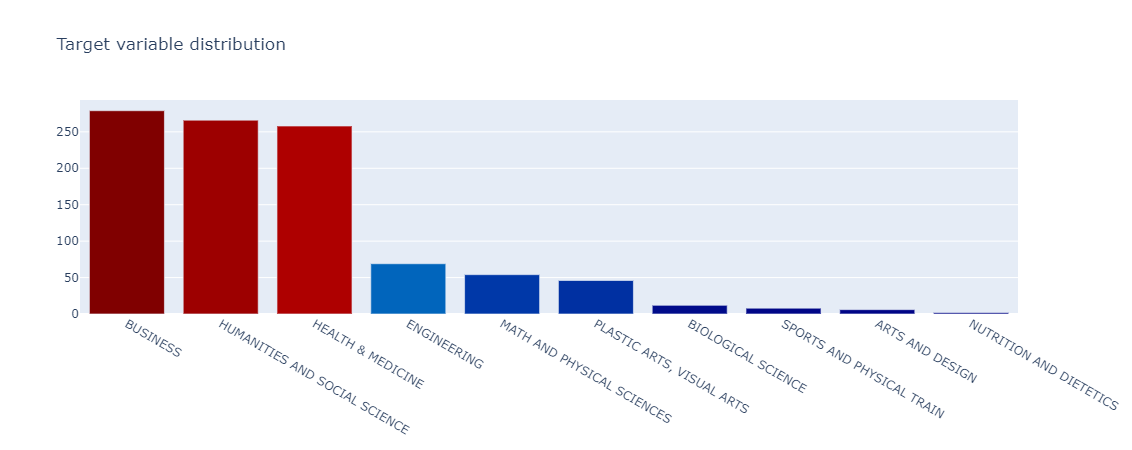

In [17]:
data = [go.Bar(
            x = df1.final_cat.unique(),
            y = df1.final_cat.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = df1.final_cat.value_counts().values
                        ),
            text='Text entries attributed to Final Category'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

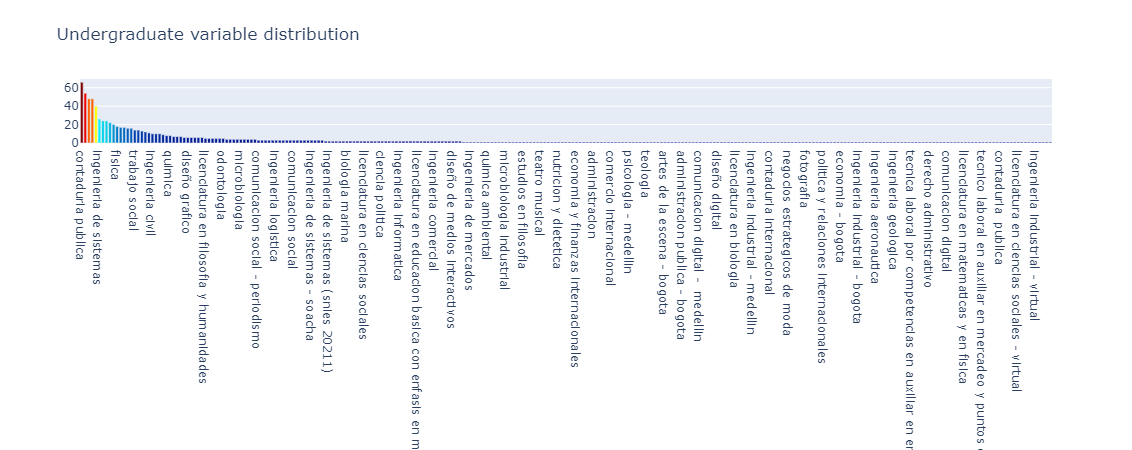

In [18]:
data = [go.Bar(
            x = df1.undergraduate.unique(),
            y = df1.undergraduate.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = df1.undergraduate.value_counts().values
                        ),
            text='Text entries attributed to undergraduate Category'
    )]

layout = go.Layout(
    title='Undergraduate variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

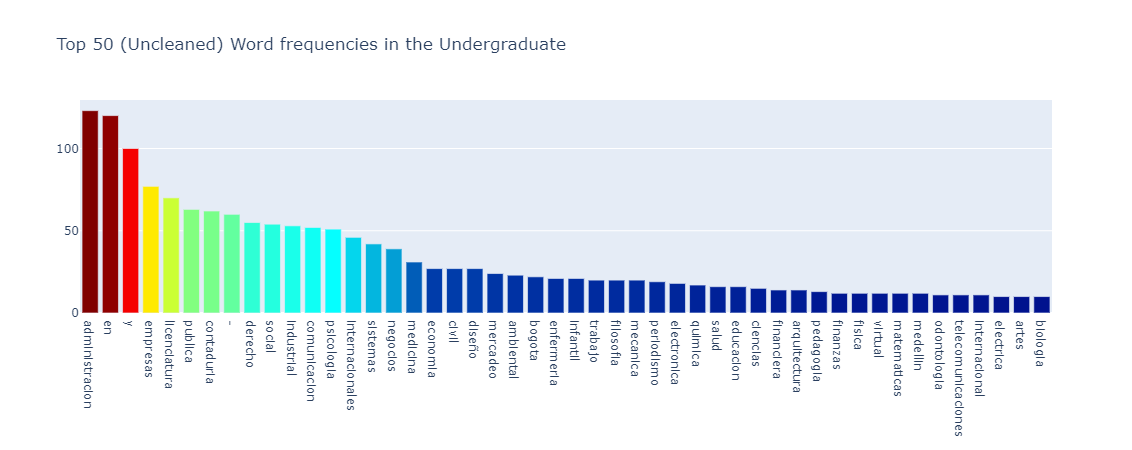

In [19]:
all_words = df1['undergraduate'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the Undergraduate'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

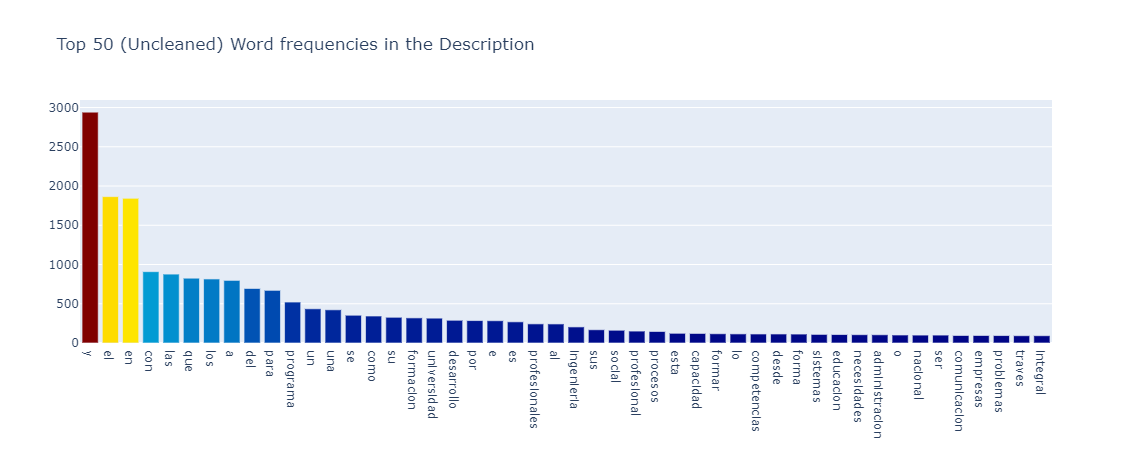

In [20]:
all_words = df1['description'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the Description'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

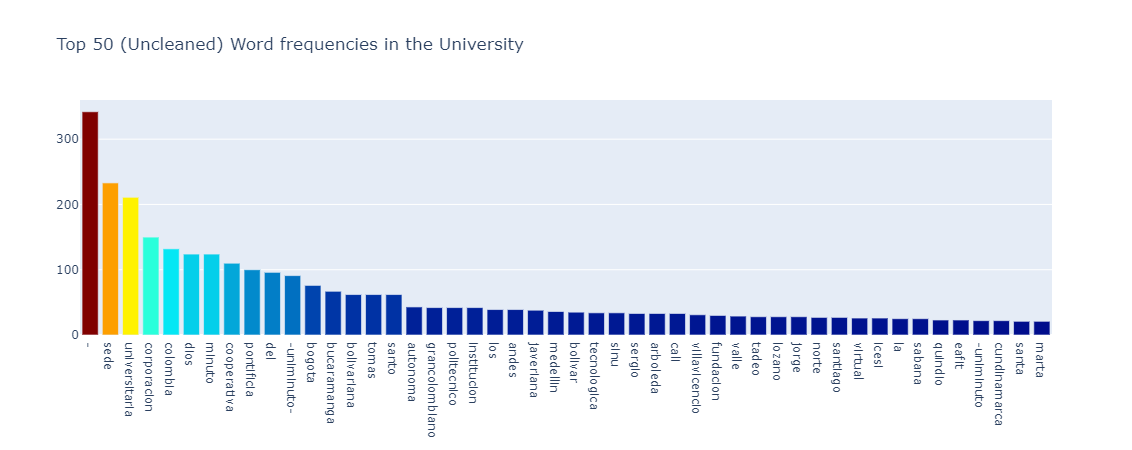

In [21]:
all_words = df1['university'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the University'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

**list of stopwords to add to the spanish stopwords**

In [22]:
stopwords_new = ['universidad','programa',
                 'formacion','desarrollo','profesionales',
                 'colombia', 'estudiante', 'quindio', 'cooperativa', 'santo', 'tomas',
                 'sergio','arboleda','pontificia','bolivariana','acreditacion','resolucion', 
                 'años','ministerio','alta','calidad','nacional','educacion','vigencia','acreditado',
                'más', 'mas', 'unir', 'paises', 'pais', 'espa', 'no', 'os', 'a','d',  'et',  'dame', '-', 'il',]

# NLTK 

* Tokenization
* Stopwords removal
* Bigram Construction

In [23]:
nltk.download('punkt')
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')
spanish_stopwords.extend(stopwords_new)

def tokenize(sentence):
    return [token for token in nltk.word_tokenize(sentence)]
def remove_stopwords(sentence):
    return [token for token in nltk.word_tokenize(sentence) if (token.lower() not in spanish_stopwords) and (token.lower() !=' ') and (token not in string.punctuation)]

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Create the cleaner function to clean the spanish text, remove non alpha numeric characters, remove duplicate, remove spanish accutes, remove digits**

In [24]:
%%time

df1['token'] = df1['description'].apply(lambda x: tokenize(x))
df1['token_no_stopwords'] = df1['description'].apply(lambda x: remove_stopwords(x))
df1['bigram'] = df1['token_no_stopwords'].apply(lambda x: list(ngrams(x, 2)))

CPU times: user 980 ms, sys: 4.26 ms, total: 984 ms
Wall time: 987 ms


In [25]:
df1.head()

index               undergraduate  \
0      1          contaduria publica   
1      2                     derecho   
2      3                  psicologia   
3      4                     derecho   
4      5  administracion de empresas   

                                          university  \
0  universidad cooperativa de colombia - sede apa...   
1  universidad cooperativa de colombia - sede apa...   
2  universidad cooperativa de colombia - sede arauca   
3  universidad cooperativa de colombia - sede arauca   
4  universidad cooperativa de colombia - sede arauca   

                                             details  \
0                                  objeto de estudio   
1                                                      
2                                                      
3  abordar el sistema juridico como conjunto de n...   
4  campos de accionel administrador de empresas d...   

                                         description   SNIES  \
0  las particularidades de este programa que se r...  104897   
1  el programa de derecho, estudia el sistema jur...  102434   
2  en la universidad cooperativa de colombia, el ...   54920   
3  el programa de derecho que se ofrece en la ins...    8630   
4  la organizacion entendida como un conjunto de...    8690   

                                    Qualified record Level of Education  \
0  resolucion 14090 del 07 de septiembre de 2015,...           pregrado   
1  resolucion 9967 del 17 de junio de 2020, vigen...           pregrado   
2  resolucion 16951 del 22 de agosto de 2016​, vi...           pregrado   
3  resolucion 10893 del 01 de junio de 2016, vige...           pregrado   
4  resolucion 08682 del 02 de mayo de 2016, vigen...           pregrado   

            Type of training              Title awarded    Modality  \
0              universitaria           contador publico  presencial   
1              universitaria                    abogado  presencial   
2  profesional universitaria                  psicologo  presencial   
3              universitaria                    abogado  presencial   
4  profesional universitaria  administrador de empresas  presencial   

       Duration Credits      Town                      final_cat  \
0   8 semestres     144  apartado                       BUSINESS   
1  10 semestres     158  apartado  HUMANITIES AND SOCIAL SCIENCE   
2   8 semestres     147    arauca  HUMANITIES AND SOCIAL SCIENCE   
3  10 semestres     158    arauca  HUMANITIES AND SOCIAL SCIENCE   
4   8 semestres     143    arauca                       BUSINESS   

                                               token  \
0  [las, particularidades, de, este, programa, qu...   
1  [el, programa, de, derecho, ,, estudia, el, si...   
2  [en, la, universidad, cooperativa, de, colombi...   
3  [el, programa, de, derecho, que, se, ofrece, e...   
4  [la, organizacion, entendida, como, un, conju...   

                                  token_no_stopwords  \
0  [particularidades, relaciona, economia, solida...   
1  [derecho, estudia, sistema, juridico, sera, ob...   
2  [psicologia, ademas, investigacion, dimension,...   
3  [derecho, ofrece, institucion, identifica, ciu...   
4  [la, organizacion, entendida, conjunto, recur...   

                                              bigram  
0  [(particularidades, relaciona), (relaciona, ec...  
1  [(derecho, estudia), (estudia, sistema), (sist...  
2  [(psicologia, ademas), (ademas, investigacion)...  
3  [(derecho, ofrece), (ofrece, institucion), (in...  
4  [(la, organizacion), (organizacion, entendida...

In [26]:
df1['token_no_stopwords'][1]

['derecho',
 'estudia',
 'sistema',
 'juridico',
 'sera',
 'objeto',
 'discusion',
 'analisis',
 'interpretacion',
 'critica',
 'argumentacion',
 'efectiva',
 'aplicacion',
 'diferentes',
 'contextos',
 'pro',
 'orden',
 'justo',
 'social']

# Topic Modeling 

* TF-IDF
* KMeans

## TF-IDF

In [27]:
vectorizer = TfidfVectorizer(stop_words=spanish_stopwords, min_df=0.005)
X = vectorizer.fit_transform(df1['description'])


### Visualizing more important terms 

* Top 30

In [28]:
N_WORDS = 30
mean_data_tfidf = np.array( X.mean( axis=0 ) ).flatten()
vocabulary = vectorizer.get_feature_names()
words_id = np.flip( mean_data_tfidf.argsort()[-N_WORDS:] )

word_val_data = [ (vocabulary[id], mean_data_tfidf[id]) for id in words_id ]
word_val_data = pd.DataFrame(word_val_data, columns=['words','values'])

<Figure size 1080x720 with 0 Axes>

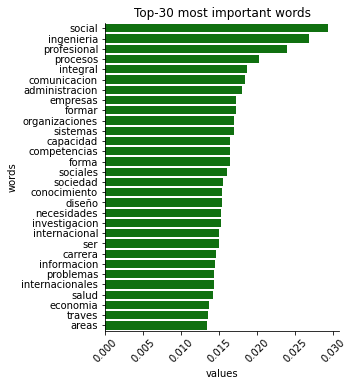

In [29]:
plt.figure(figsize=(15,10))
g = sns.catplot(data=word_val_data, color='green',
                 x='values', y='words', kind='bar' )
g.ax.tick_params(axis='x', rotation=45)
g.ax.set_title( f"Top-{N_WORDS} most important words" )
plt.show()

# KMeans

## Selecting number of clusters
* Silhouette Score

In [30]:
from sklearn.metrics import silhouette_score, silhouette_samples


In [31]:
%%time
cluster_sizes = range(2, 11+1)
kmeans_models = [ KMeans(i, n_init=10, random_state=2140) for i in cluster_sizes ]
cluster_score = []

for kmeans in kmeans_models:
    y = kmeans.fit_predict(X)
    score = silhouette_score(X, y)
    cluster_score.append( ( kmeans.n_clusters, score) )

cluster_score=np.array(cluster_score)

CPU times: user 12.3 s, sys: 177 ms, total: 12.4 s
Wall time: 3.22 s


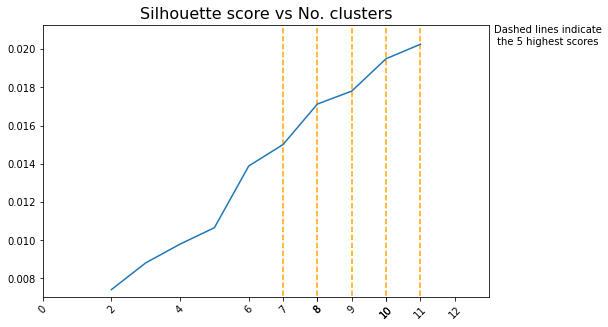

CPU times: user 905 ms, sys: 85.9 ms, total: 991 ms
Wall time: 249 ms


In [32]:
%%time
scores = cluster_score[:, 1]
clusters = cluster_score[:, 0]
max_score_clusters = []

fig, ax = plt.subplots( figsize=(8,5) )
ax = sns.lineplot( x=clusters, y=scores, ax=ax )
ax.set_title("Silhouette score vs No. clusters", fontsize=16)

for i in np.argsort( scores )[-5:]:
    ax.vlines(clusters[i], 0, 1, linestyles='--', colors='orange')
    max_score_clusters.append( clusters[i] )

ax.text(1.01, 1, f"Dashed lines indicate\n the {len(max_score_clusters)} highest scores",
        transform=ax.transAxes, ha='left', va='top')

xticks = ax.get_xticks().astype(int)
xticks = np.append(xticks, max_score_clusters)
ax.set_xticks( xticks )
ax.tick_params(axis='x', rotation=45)

ax.set_ylim( [ 0.95*min(scores), 1.05*max(scores) ] )
ax.set_xlim( [ 0, max(clusters)+2 ] )

plt.show()

## Depending on the Silhouette Score above will chose K=10

In [33]:
n_clusters=10
kmeans_model = KMeans(n_clusters, n_init=20, random_state=2140)
y = kmeans_model.fit_predict(X)

## Results visualization of Silhouette Score

### Silhouette samples

In [34]:
sample_scores = silhouette_samples( X, y )
sample_scores_df =  pd.DataFrame( data = {'Cluster':y, 'Silhouette':sample_scores} )
sample_scores_df = sample_scores_df.reset_index()
sample_scores_df=sample_scores_df.sort_values('Silhouette', ascending=False)
sample_scores_df

index  Cluster  Silhouette
829    829        9    0.438385
915    915        9    0.438385
119    119        9    0.438385
896    896        9    0.438385
264    264        9    0.438385
..     ...      ...         ...
938    938        8   -0.052585
187    187        0   -0.055811
261    261        8   -0.056176
541    541        4   -0.063684
504    504        8   -0.071328

[1000 rows x 3 columns]

In [35]:
sample_scores_df.Cluster.unique()

array([9, 3, 1, 6, 7, 5, 0, 8, 2, 4], dtype=int32)

In [36]:
def plot_silhouette_samples(X, pred_labels):
    n_clusters = len(np.unique(pred_labels))

    fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
  
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(X, pred_labels)
    sample_silhouette_values = silhouette_samples(X, pred_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[pred_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
  
        ax.fill_betweenx(np.arange(y_lower, y_upper), 
                     0, ith_cluster_silhouette_values )
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),
            ha='center', va='center', fontsize=12,
            bbox={'boxstyle':'square',
                  'facecolor':'white'})
        y_lower = y_upper + 10
  
    ax.set_title(f"The silhouette score plot for the {n_clusters} clusters.\n",fontsize=20)
    ax.set_xlabel("Silhouette coefficient values",fontsize=18)
    ax.set_ylabel("Cluster",fontsize=18)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    fig.savefig("silhouette.png")
    plt.show()

    return ax

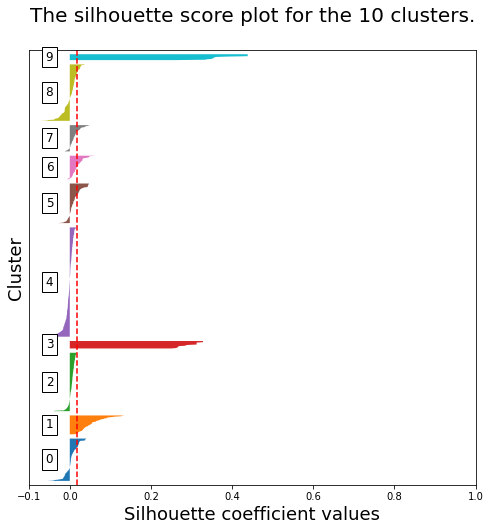

<AxesSubplot:title={'center':'The silhouette score plot for the 10 clusters.\n'}, xlabel='Silhouette coefficient values', ylabel='Cluster'>

In [37]:
plot_silhouette_samples(X, y)

## Most Important top 5 Words in each cluster

In [38]:
def most_important_words(data_tfidf, y, topn=20):
    n_clusters = len(np.unique(y))
    result = []
    for i in range(n_clusters):
        ith_cluter_word_sum = np.mean(data_tfidf[np.argwhere(y==i).flatten()], axis=0)
    
        word_ids = np.array( np.argsort( ith_cluter_word_sum )[0, -topn:] )
        word_ids = word_ids.reshape( -1 )
        result = result + [ (i, id, ith_cluter_word_sum[0, id] ) for id in word_ids ]

    return result

In [39]:
word_cluster_df = pd.DataFrame( most_important_words( X, y, topn=20 ), columns=["Cluster", "WordId", "Score"] )
word_cluster_df["Word"] = word_cluster_df["WordId"].apply( lambda id: vectorizer.get_feature_names()[id] )
word_cluster_df = word_cluster_df.sort_values( "Score", ascending=False )
word_cluster_df.head()

Cluster  WordId     Score            Word
39         1     222  0.302138    comunicacion
79         3    1115  0.250837       solidaria
199        9     522  0.223151      financiera
78         3     392  0.204487        economia
198        9      38  0.196958  administracion

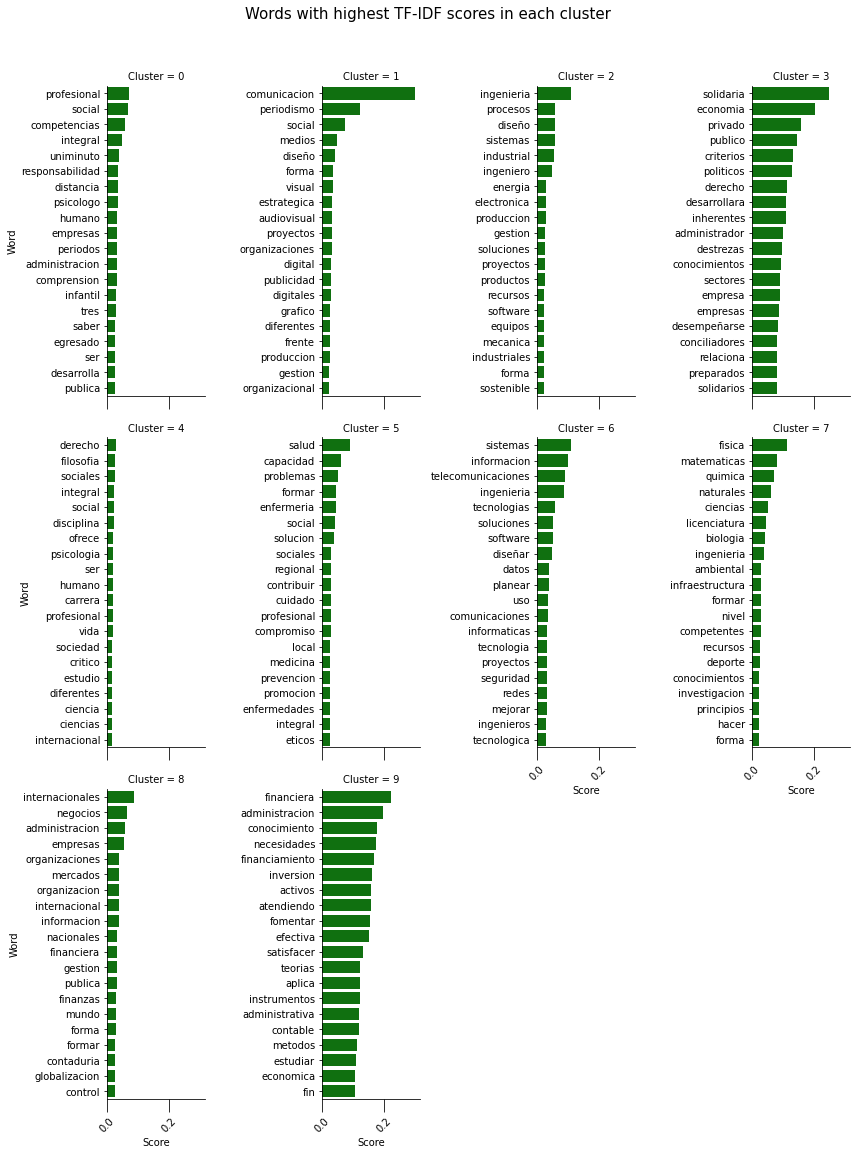

In [40]:
g = sns.catplot(x="Score", y="Word", col="Cluster", data=word_cluster_df, 
                sharey=False, col_wrap=4, kind="bar",
                color = 'green', aspect=.6)
[ ax.tick_params(axis='x', rotation=45, size=13) for ax in g.axes.flatten() ]
g.fig.suptitle( "Words with highest TF-IDF scores in each cluster", y = 1.05, fontsize=15 )
g.fig.savefig("kmeans_clusters_top20WordsperEach.png".format(i))
plt.show()

In [41]:
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())
final_df = tf_idf
print("{} rows".format(final_df.shape[0]))
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

1000 rows


0    1    2    3    4    5         6    7    8    9    \
preparados        0.269361  0.0  0.0  0.0  0.0  0.0  0.269361  0.0  0.0  0.0   
relaciona         0.269361  0.0  0.0  0.0  0.0  0.0  0.269361  0.0  0.0  0.0   
particularidades  0.264782  0.0  0.0  0.0  0.0  0.0  0.264782  0.0  0.0  0.0   
mundiales         0.260601  0.0  0.0  0.0  0.0  0.0  0.260601  0.0  0.0  0.0   
practicos         0.246779  0.0  0.0  0.0  0.0  0.0  0.246779  0.0  0.0  0.0   

                  ...  990  991  992  993  994  995  996       997  998  999  
preparados        ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  
relaciona         ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  
particularidades  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  
mundiales         ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.333897  0.0  0.0  
practicos         ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  

[5 rows x 1000 columns]

## Most Important top 20 Words in each cluster

In [42]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    fig = plt.figure(figsize=(16, 8))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.savefig("MostCommonWordsInCluster_{}.png".format(i))
        plt.show()
        plt.clf() 
    
    


In [43]:
%%time
final_df_array = final_df.to_numpy()
prediction = kmeans_model.predict(final_df)


CPU times: user 112 ms, sys: 43.2 ms, total: 155 ms
Wall time: 56.1 ms


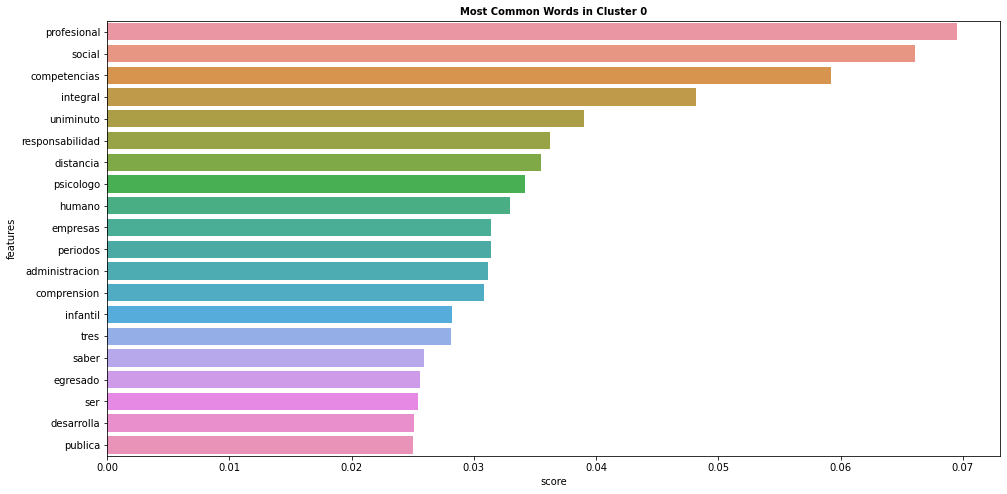

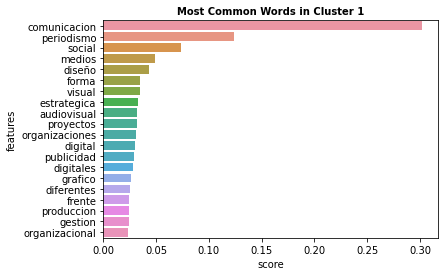

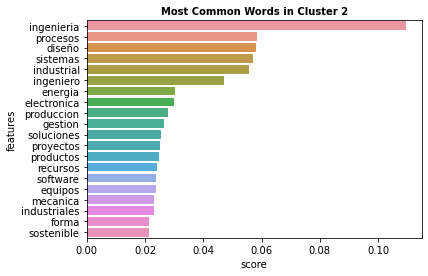

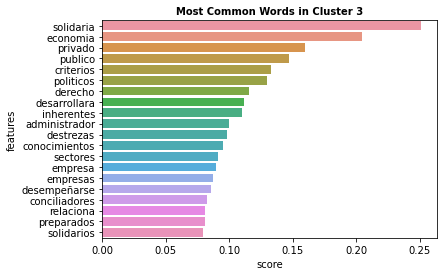

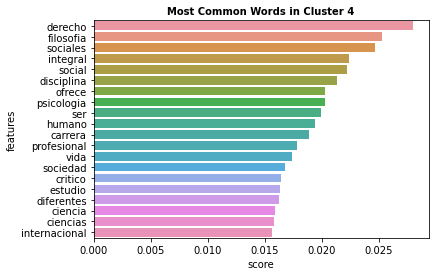

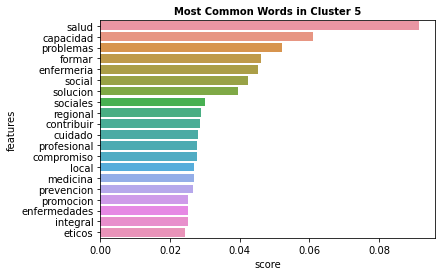

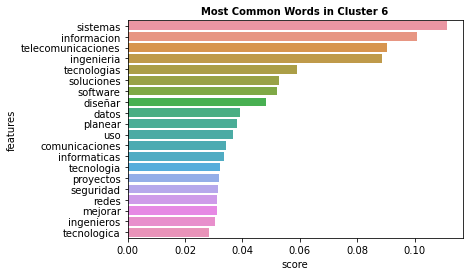

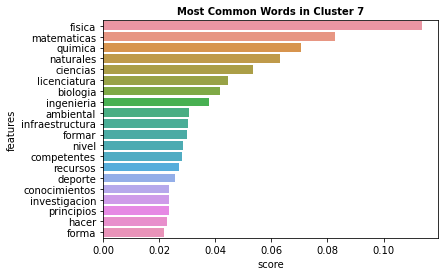

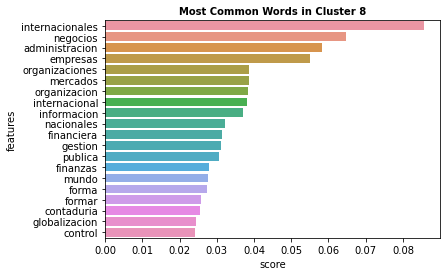

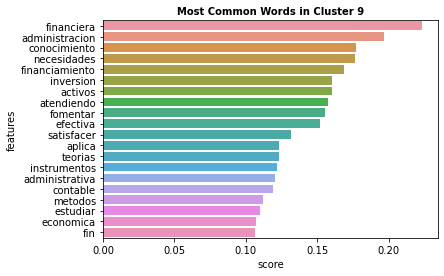

<Figure size 432x288 with 0 Axes>

In [44]:
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, n_feats)

## Word Cloud for Each Cluster

### Transforms a centroids dataframe into a dictionary to be used on a WordCloud.

In [45]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        fig = plt.figure(figsize=(16,8))
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.savefig("WordClouds_clusters{}.png".format(i))
        plt.show()
        plt.clf()

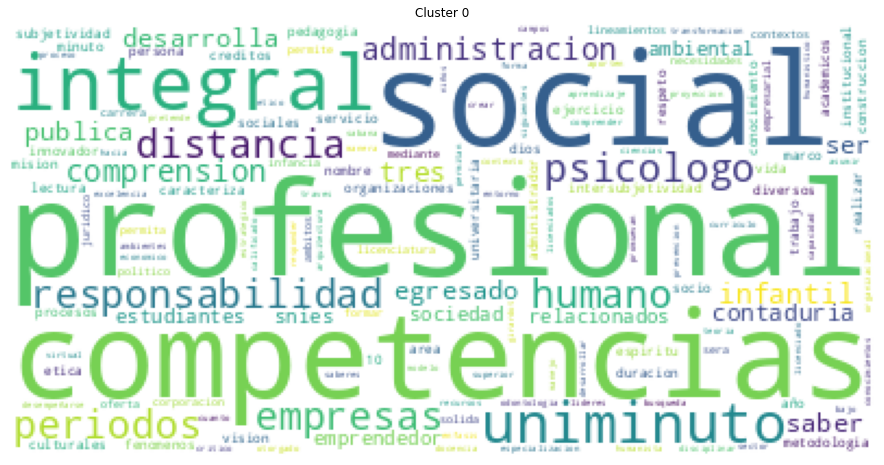

<Figure size 432x288 with 0 Axes>

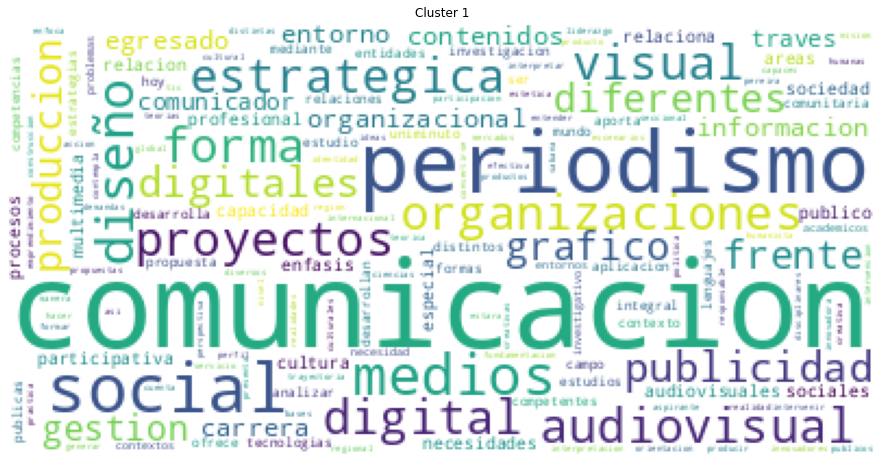

<Figure size 432x288 with 0 Axes>

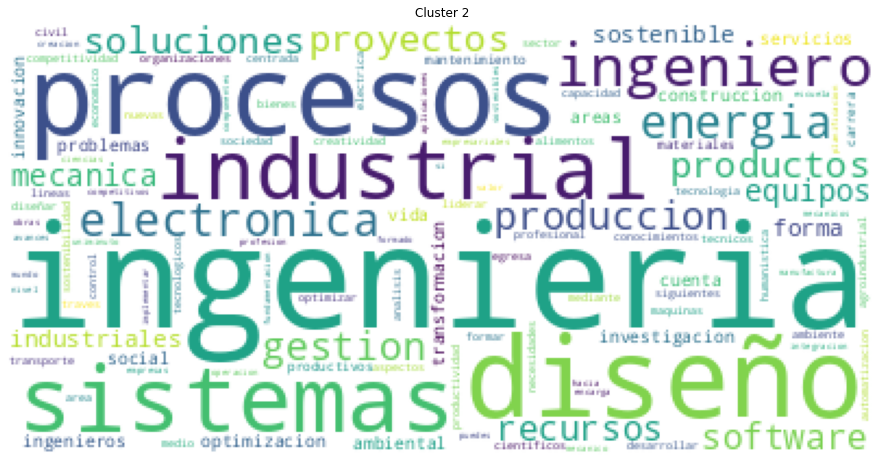

<Figure size 432x288 with 0 Axes>

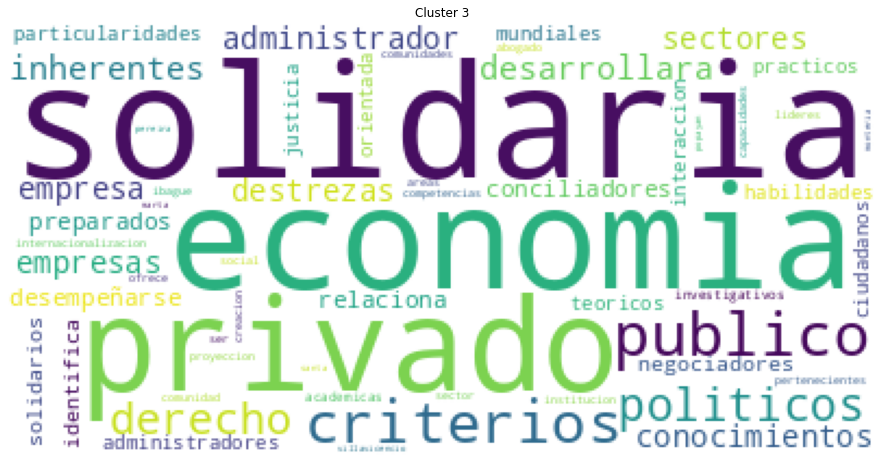

<Figure size 432x288 with 0 Axes>

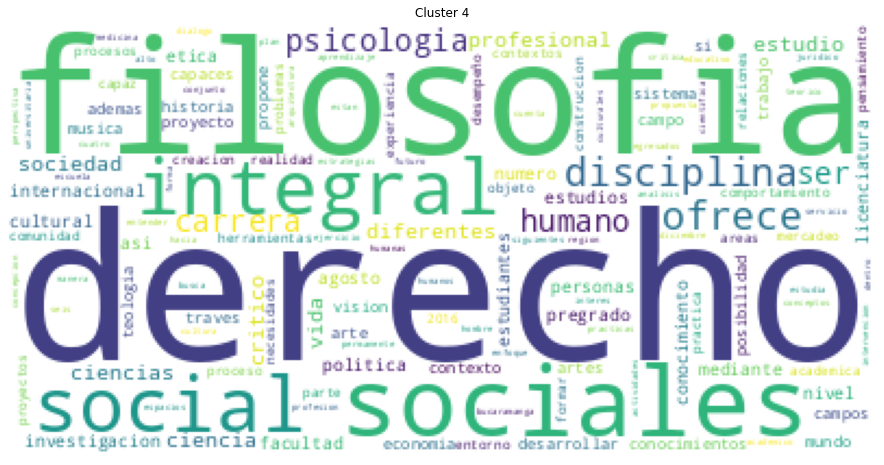

<Figure size 432x288 with 0 Axes>

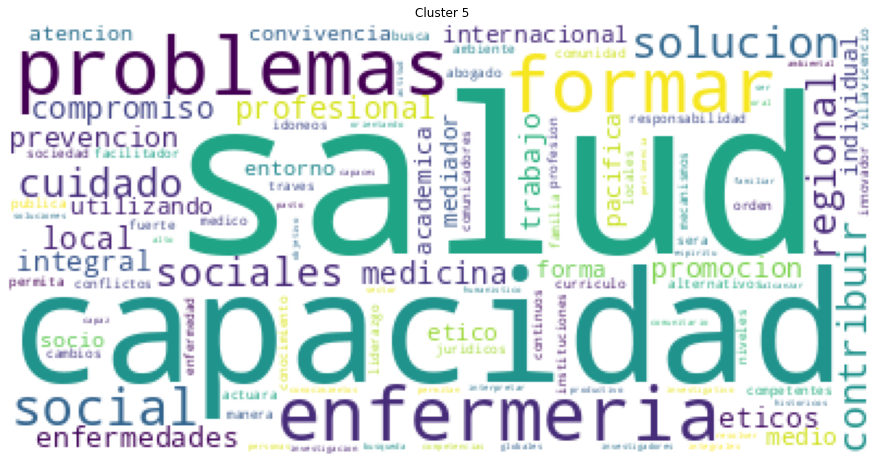

<Figure size 432x288 with 0 Axes>

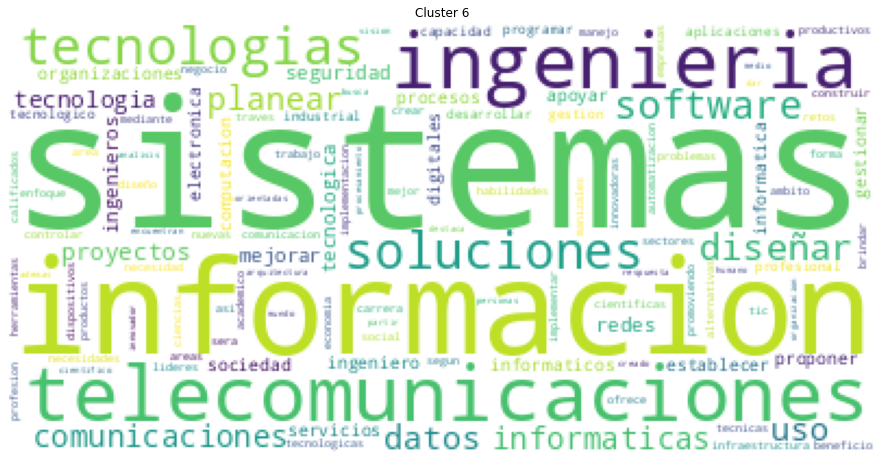

<Figure size 432x288 with 0 Axes>

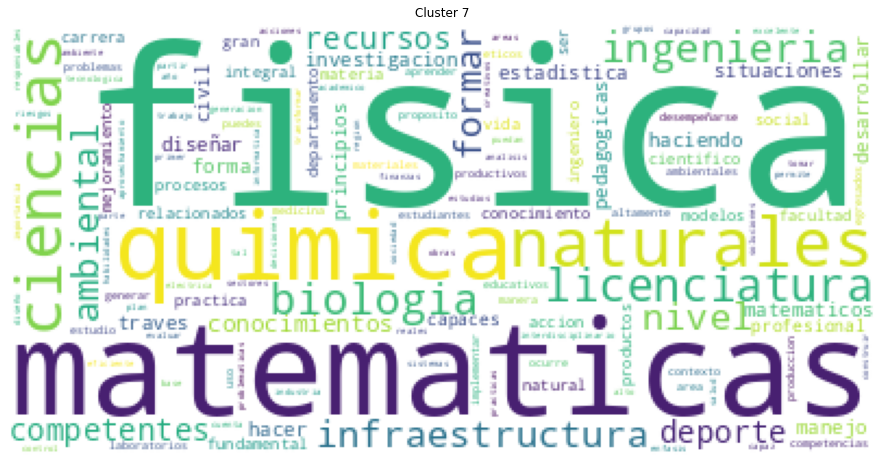

<Figure size 432x288 with 0 Axes>

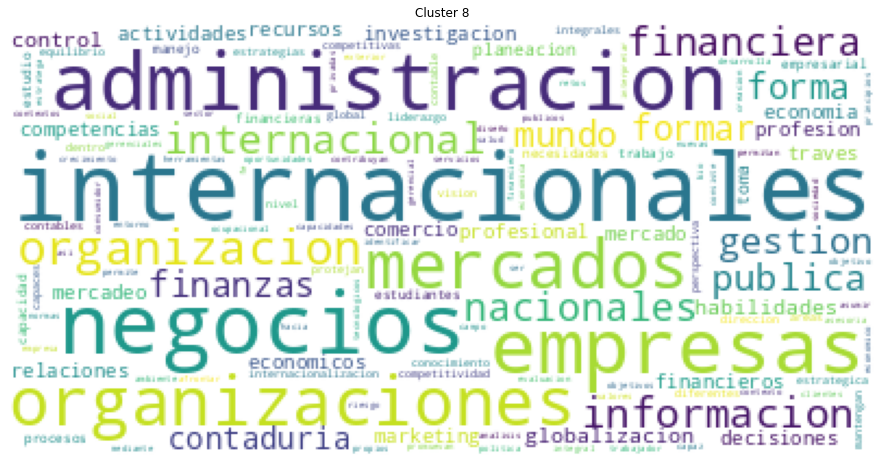

<Figure size 432x288 with 0 Axes>

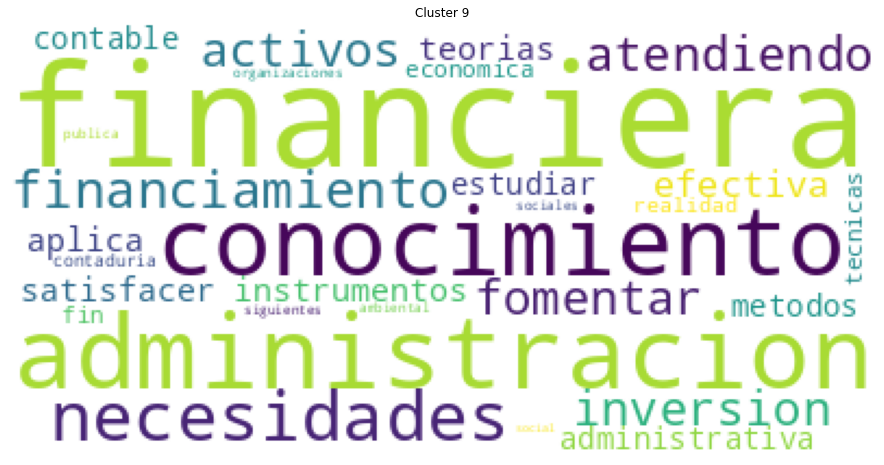

<Figure size 432x288 with 0 Axes>

In [46]:
centroids = pd.DataFrame(kmeans_model.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [48]:
df_clustered = df1.copy()

In [49]:
# Assigning the cluster labels to each country
labels = kmeans_model.labels_ 
df_clustered['Cluster'] = labels
df_clustered.head()

index               undergraduate  \
0      1          contaduria publica   
1      2                     derecho   
2      3                  psicologia   
3      4                     derecho   
4      5  administracion de empresas   

                                          university  \
0  universidad cooperativa de colombia - sede apa...   
1  universidad cooperativa de colombia - sede apa...   
2  universidad cooperativa de colombia - sede arauca   
3  universidad cooperativa de colombia - sede arauca   
4  universidad cooperativa de colombia - sede arauca   

                                             details  \
0                                  objeto de estudio   
1                                                      
2                                                      
3  abordar el sistema juridico como conjunto de n...   
4  campos de accionel administrador de empresas d...   

                                         description   SNIES  \
0  las particularidades de este programa que se r...  104897   
1  el programa de derecho, estudia el sistema jur...  102434   
2  en la universidad cooperativa de colombia, el ...   54920   
3  el programa de derecho que se ofrece en la ins...    8630   
4  la organizacion entendida como un conjunto de...    8690   

                                    Qualified record Level of Education  \
0  resolucion 14090 del 07 de septiembre de 2015,...           pregrado   
1  resolucion 9967 del 17 de junio de 2020, vigen...           pregrado   
2  resolucion 16951 del 22 de agosto de 2016​, vi...           pregrado   
3  resolucion 10893 del 01 de junio de 2016, vige...           pregrado   
4  resolucion 08682 del 02 de mayo de 2016, vigen...           pregrado   

            Type of training              Title awarded    Modality  \
0              universitaria           contador publico  presencial   
1              universitaria                    abogado  presencial   
2  profesional universitaria                  psicologo  presencial   
3              universitaria                    abogado  presencial   
4  profesional universitaria  administrador de empresas  presencial   

       Duration Credits      Town                      final_cat  \
0   8 semestres     144  apartado                       BUSINESS   
1  10 semestres     158  apartado  HUMANITIES AND SOCIAL SCIENCE   
2   8 semestres     147    arauca  HUMANITIES AND SOCIAL SCIENCE   
3  10 semestres     158    arauca  HUMANITIES AND SOCIAL SCIENCE   
4   8 semestres     143    arauca                       BUSINESS   

                                               token  \
0  [las, particularidades, de, este, programa, qu...   
1  [el, programa, de, derecho, ,, estudia, el, si...   
2  [en, la, universidad, cooperativa, de, colombi...   
3  [el, programa, de, derecho, que, se, ofrece, e...   
4  [la, organizacion, entendida, como, un, conju...   

                                  token_no_stopwords  \
0  [particularidades, relaciona, economia, solida...   
1  [derecho, estudia, sistema, juridico, sera, ob...   
2  [psicologia, ademas, investigacion, dimension,...   
3  [derecho, ofrece, institucion, identifica, ciu...   
4  [la, organizacion, entendida, conjunto, recur...   

                                              bigram  Cluster  
0  [(particularidades, relaciona), (relaciona, ec...        3  
1  [(derecho, estudia), (estudia, sistema), (sist...        4  
2  [(psicologia, ademas), (ademas, investigacion)...        4  
3  [(derecho, ofrece), (ofrece, institucion), (in...        3  
4  [(la, organizacion), (organizacion, entendida...        4

In [50]:
df_clustered['Silhouette_score'] = sample_scores_df['Silhouette']
df_clustered.head()

index               undergraduate  \
0      1          contaduria publica   
1      2                     derecho   
2      3                  psicologia   
3      4                     derecho   
4      5  administracion de empresas   

                                          university  \
0  universidad cooperativa de colombia - sede apa...   
1  universidad cooperativa de colombia - sede apa...   
2  universidad cooperativa de colombia - sede arauca   
3  universidad cooperativa de colombia - sede arauca   
4  universidad cooperativa de colombia - sede arauca   

                                             details  \
0                                  objeto de estudio   
1                                                      
2                                                      
3  abordar el sistema juridico como conjunto de n...   
4  campos de accionel administrador de empresas d...   

                                         description   SNIES  \
0  las particularidades de este programa que se r...  104897   
1  el programa de derecho, estudia el sistema jur...  102434   
2  en la universidad cooperativa de colombia, el ...   54920   
3  el programa de derecho que se ofrece en la ins...    8630   
4  la organizacion entendida como un conjunto de...    8690   

                                    Qualified record Level of Education  \
0  resolucion 14090 del 07 de septiembre de 2015,...           pregrado   
1  resolucion 9967 del 17 de junio de 2020, vigen...           pregrado   
2  resolucion 16951 del 22 de agosto de 2016​, vi...           pregrado   
3  resolucion 10893 del 01 de junio de 2016, vige...           pregrado   
4  resolucion 08682 del 02 de mayo de 2016, vigen...           pregrado   

            Type of training              Title awarded    Modality  \
0              universitaria           contador publico  presencial   
1              universitaria                    abogado  presencial   
2  profesional universitaria                  psicologo  presencial   
3              universitaria                    abogado  presencial   
4  profesional universitaria  administrador de empresas  presencial   

       Duration Credits      Town                      final_cat  \
0   8 semestres     144  apartado                       BUSINESS   
1  10 semestres     158  apartado  HUMANITIES AND SOCIAL SCIENCE   
2   8 semestres     147    arauca  HUMANITIES AND SOCIAL SCIENCE   
3  10 semestres     158    arauca  HUMANITIES AND SOCIAL SCIENCE   
4   8 semestres     143    arauca                       BUSINESS   

                                               token  \
0  [las, particularidades, de, este, programa, qu...   
1  [el, programa, de, derecho, ,, estudia, el, si...   
2  [en, la, universidad, cooperativa, de, colombi...   
3  [el, programa, de, derecho, que, se, ofrece, e...   
4  [la, organizacion, entendida, como, un, conju...   

                                  token_no_stopwords  \
0  [particularidades, relaciona, economia, solida...   
1  [derecho, estudia, sistema, juridico, sera, ob...   
2  [psicologia, ademas, investigacion, dimension,...   
3  [derecho, ofrece, institucion, identifica, ciu...   
4  [la, organizacion, entendida, conjunto, recur...   

                                              bigram  Cluster  \
0  [(particularidades, relaciona), (relaciona, ec...        3   
1  [(derecho, estudia), (estudia, sistema), (sist...        4   
2  [(psicologia, ademas), (ademas, investigacion)...        4   
3  [(derecho, ofrece), (ofrece, institucion), (in...        3   
4  [(la, organizacion), (organizacion, entendida...        4   

   Silhouette_score  
0          0.312498  
1         -0.005522  
2         -0.016341  
3          0.328151  
4          0.005707

In [51]:
from bokeh.plotting import figure, show, output_notebook, output_file, save
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Category10
import umap
from sklearn.decomposition import PCA

In [52]:
#2D view of clusters and data with U-Map
output_notebook()

Loading BokehJS ...

In [53]:
pca = PCA( 0.95, random_state=2140)
data_pca = pca.fit_transform(X.todense())

In [54]:
umap_red = umap.UMAP(n_neighbors=12, metric='correlation', 
                     random_state=214)
data_2d = umap_red.fit_transform( data_pca )

In [55]:
data_2d

array([[ 7.223454 ,  7.4368567],
       [ 1.5734522,  8.480722 ],
       [ 1.2174858,  6.7593   ],
       ...,
       [-0.5773373,  8.629512 ],
       [-1.9028841,  8.272332 ],
       [ 0.6272265,  6.233774 ]], dtype=float32)

In [56]:
from sklearn.model_selection import train_test_split


In [57]:
df1.description = df1['description'].astype(str) 

In [59]:
data_2d_df = pd.DataFrame( data={"x":data_2d[:, 0], 
                                 "y":data_2d[:, 1], 
                                 "Cluster":y,
                                 "Silhouette":sample_scores } )

c_pallete = list(Category10[10])
c_pallete[7], c_pallete[0] = c_pallete[0], c_pallete[7]

data_2d_df['colors'] = [ c_pallete[i] for i in data_2d_df['Cluster'] ]
data_2d_df['description'] = df1['description']

In [60]:
data_2d_df = data_2d_df.fillna(' ')

In [61]:
#Limiting the text's size
data_2d_df['description'] = data_2d_df['description'].str.slice(0,5)

data_2d_df, _,_,_ = train_test_split(data_2d_df, data_2d_df, train_size=800, stratify=data_2d_df['Cluster'])

data_2d_cdf = ColumnDataSource(data_2d_df)

In [62]:
fig = figure(
    title='UMAP 2D projection of the points and clusters',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset', 'save')
)

fig.add_tools(HoverTool(tooltips="""
                                      <div>
                                        <span style='font-size: 10px; color: @colors'>@ementa</span>
                                        <span style='font-size: 10px'>cluster - </span>
                                        <span style='font-size: 10px'>@Cluster ;</span>
                                        <span style='font-size: 10px'>index - </span>
                                        <span style='font-size: 10px'>$index ;</span>
                                        <span style='font-size: 10px'>silhouette: </span>
                                        <span style='font-size: 10px'>@Silhouette</span>
                                      </div>
                                 """)
              )

fig.circle('x','y', source=data_2d_cdf, color='colors', 
           legend_group="Cluster",
           line_alpha=0.6, fill_alpha=0.6, size=2)

show(fig)
save(fig, "UMAP2D.html")

'/kaggle/working/UMAP2D.html'

In [63]:
# To Save at the end
final_df.to_csv("final_df.csv")
centroids.to_csv("centroids.csv")
df_clustered.to_csv("clustered_data_withCentroids.csv")

# Train fastText word embeddings from Gensim


As you already know FastText word embeddings support both Continuous Bag of Words (CBOW) and Skip-Gram models. In this tutorial, I will implement fastText word embeddings for Skip-Gram only.

**Reference**

* https://thinkinfi.com/fasttext-word-embeddings-python-implementation/

In [64]:
from gensim.models.fasttext import FastText
 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [66]:
%%time
# Defining values for parameters
embedding_size = 300
window_size = 5
min_word = 10
down_sampling = 1e-2
 

fast_Text_model = FastText(df_clustered['token'],
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      workers = 4,
                      sg=1,
                      iter=100)

CPU times: user 2min 8s, sys: 1.42 s, total: 2min 9s
Wall time: 43.1 s


# Save & Load Gensim fastText word embeddings Python model

It is good practice to save trained fastText word embeddings model so that we can load pre-trained fastText word embeddings model for later use and we can also update fastText word embeddings model.

In [68]:
from gensim.models import Word2Vec
# Save fastText gensim model
fast_Text_model.save("ft_model_careers")
# Load saved gensim fastText model
fast_Text_model = Word2Vec.load("ft_model_careers")

# Explore Gensim fastText model

Now it’s time to explore word embedding of our trained Gensim fastText word embeddings model.

In [69]:
# Check word embedding for a perticular word
fast_Text_model.wv['matematicas']

array([-0.02063312, -0.4498056 ,  0.20598865, -0.3778342 ,  0.19909124,
        0.48028976, -0.49589124,  0.16262794, -0.10176015, -0.04185675,
        0.0873037 ,  0.32526478,  0.02686421, -0.6307171 , -0.1225716 ,
        0.36175174, -0.03733932, -0.1980463 ,  0.18983081, -0.24832542,
       -0.6301066 , -0.24319515, -0.06880095, -0.17428915,  0.2374561 ,
        0.3863973 , -0.21807113, -0.3018143 , -0.27060294,  0.09211157,
        0.2212943 ,  0.5135573 , -0.03739166,  0.01674037, -0.12039827,
       -0.2466476 ,  0.20813993,  0.31908545,  0.15772675, -0.00302477,
        0.10289896, -0.15155245,  0.11250003,  0.41583893, -0.11759668,
        0.11194619,  0.32134268, -0.15789172, -0.08250149,  0.44964668,
       -0.09069164, -0.04060944, -0.24029155,  0.82619566, -0.2824931 ,
       -0.10995404,  0.23121215, -0.05570317, -0.0448815 , -0.09755687,
       -0.3597193 , -0.08778405, -0.39851815,  0.7805711 , -0.15281986,
       -0.14169274,  0.19411483, -0.30538324, -0.1431597 , -0.32

The similarity score here is calculated by taking cosine similarity between two specific words using their word vector (word embedding).
Note, If you check similarity between two identical words (same words), the score will be 1 as the range of the cosine similarity is [-1 to 1] and sometimes can go between [0,1] depending upon how it’s being calculated.

In [70]:
# Dimention must be 300
fast_Text_model.wv['matematicas'].shape

(300,)

In [71]:
# Check top 10 similar word for a given word by gensim fastText
fast_Text_model.wv.most_similar('matematicas', topn=10)

[('problematicas', 0.5161546468734741),
 ('informaticas', 0.42641153931617737),
 ('biologia', 0.4133349061012268),
 ('fisica', 0.40219905972480774),
 ('quimica', 0.40195906162261963),
 ('pedagogicas', 0.38470298051834106),
 ('teoricas', 0.38008975982666016),
 ('profesores', 0.3718724548816681),
 ('economicas', 0.365728497505188),
 ('tecnicas', 0.3648092746734619)]

In [72]:
# Check top 10 similarity score between two word
fast_Text_model.wv.similarity('matematicas', 'informaticas')

0.42641154

In [73]:
# Most opposite to a word
fast_Text_model.wv.most_similar(negative=["matematicas"], topn=10)

[('contribuyendo', 0.12502358853816986),
 ('tipo', 0.09057188034057617),
 ('papel', 0.06917288899421692),
 ('hacia', 0.06672058999538422),
 ('partir', 0.04790408909320831),
 ('proyectos', 0.04518510401248932),
 ('excelencia', 0.044775575399398804),
 ('generan', 0.04326985031366348),
 ('crear', 0.04134082421660423),
 ('amplio', 0.04077601432800293)]

# FastText word embeddings visualization using tsne

* It’s difficult to visualize fastText word embeddings directly as word embedding usually have more than 3 dimensions (in our case 300).

* Now for fastText word embeddings visualization, we need to reduce dimension by applying PCA (Principal Component Analysis) and T-SNE.

* The following code is to visualize fastText word embeddings using tsne plot.

In [74]:
# tsne plot for below word
# for_word = 'food'
def tsne_plot(for_word, w2v_model):
    # trained fastText model dimention
    dim_size = w2v_model.wv.vectors.shape[1]
 
    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']
 
    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)
 
    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=10)
 
    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
 
    #---------------------- Apply PCA and tsne to reduce dimention --------------
 
    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)
 
    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)
 
    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})
 
    #------------------------- tsne plot Python -----------------------------------
 
    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )
 
    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)
 
 
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
 
    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')

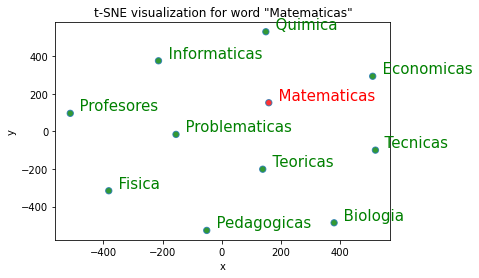

In [75]:
# tsne plot for top 10 similar word to 'chicken'
tsne_plot(for_word='matematicas', w2v_model=fast_Text_model)

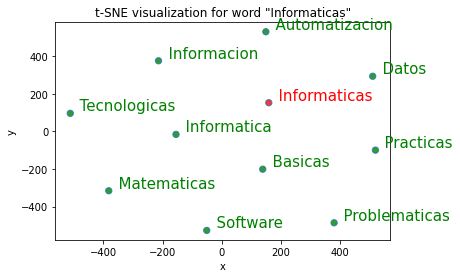

In [76]:
# tsne plot for top 10 similar word to 'chicken'
tsne_plot(for_word='informaticas', w2v_model=fast_Text_model)

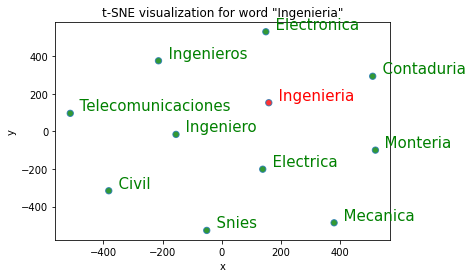

In [77]:
# tsne plot for top 10 similar word to 'chicken'
tsne_plot(for_word='ingenieria', w2v_model=fast_Text_model)

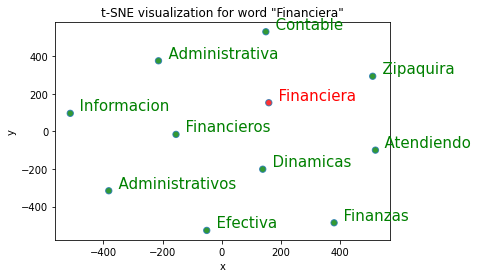

In [78]:
# tsne plot for top 10 similar word to 'chicken'
tsne_plot(for_word='financiera', w2v_model=fast_Text_model)

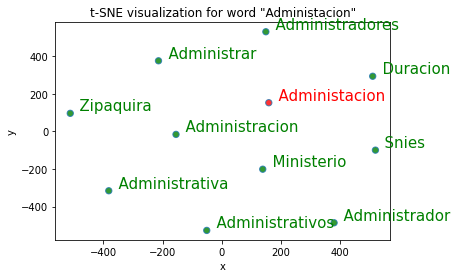

In [79]:
# tsne plot for top 10 similar word to 'chicken'
tsne_plot(for_word='administacion', w2v_model=fast_Text_model)
